# Read data

In [44]:
import pandas as pd

# df = pd.read_csv("assets/section-4-pandas/sbux.csv")
df = pd.read_csv("assets/section-4-pandas/sbux.csv", index_col='date')
# df = pd.read_csv("https://foo.bar") # also works for reading from a URL
print(df.head(2))

             open    high    low   close   volume  Name
date                                                   
2013-02-08  27.92  28.325  27.92  28.185  7146296  SBUX
2013-02-11  28.26  28.260  27.93  28.070  5457354  SBUX


In [6]:
# Previewing data from a dataframe
df.head()
df.head(10)
df.tail()
df.tail(10)

,date,open,high,low,close,volume,Name
1249,2018-01-25,61.030,61.20,60.40,60.55,16225618,SBUX
1250,2018-01-26,57.940,58.17,56.55,57.99,51851690,SBUX
1251,2018-01-29,57.550,58.35,56.91,57.02,18899867,SBUX
1252,2018-01-30,56.960,57.54,56.74,57.19,14341155,SBUX
1253,2018-01-31,57.230,57.45,56.70,56.81,13118364,SBUX
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [5]:
# Understanging the strucutre of the data
df.info()
# RangeIndex: 1259 entries, 0 to 1258
# Data columns (total 7 columns):
#  #   Column  Non-Null Count  Dtype
# ---  ------  --------------  -----
#  0   date    1259 non-null   object
#  1   open    1259 non-null   float64
#  2   high    1259 non-null   float64
#  3   low     1259 non-null   float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


# Select Rows and Columns in a dataframe

In [13]:
df.columns
df.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'name']
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'name'], dtype='object')

In [21]:
df[[ 'close']]

pandas.core.frame.DataFrame

In [46]:
df = pd.read_csv("assets/section-4-pandas/sbux.csv", index_col='date')
df.iloc[2]
df.loc["2013-02-22"]

open         26.85
high        27.105
low          26.64
close       27.085
volume    11487316
Name          SBUX
Name: 2013-02-22, dtype: object

In [49]:
df['open'] > 64

pandas.core.series.Series

In [50]:
df[df['open'] > 64]

,open,high,low,close,volume,Name
date,,,,,,
2017-06-05,64.85,64.870,64.18,64.27,6809284,SBUX
2017-06-06,64.22,64.350,64.05,64.16,5448439,SBUX
2017-06-07,64.13,64.295,63.34,63.50,8364994,SBUX


In [53]:
df.values

array([[27.92, 28.325, 27.92, 28.185, 7146296, 'SBUX'],
       [28.26, 28.26, 27.93, 28.07, 5457354, 'SBUX'],
       [28.0, 28.275, 27.975, 28.13, 8665592, 'SBUX'],
       ...,
       [55.53, 56.26, 54.57, 54.69, 16059955, 'SBUX'],
       [53.685, 56.06, 53.56, 55.61, 17415065, 'SBUX'],
       [55.08, 55.43, 54.44, 54.46, 13927022, 'SBUX']], dtype=object)

In [57]:
subset_df = df[['open', 'close']]
subset_df.to_csv('output.csv')

In [63]:
df = pd.read_csv("assets/section-4-pandas/sbux.csv")
def date_to_year(row):
    return int(row['date'].split('-')[0])

df.apply(date_to_year, axis=1)

df['year'] = df.apply(date_to_year, axis=1)
df

,date,open,high,low,close,volume,Name,year
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,2013
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,2013
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,2013
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,2013
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,2013
...,...,...,...,...,...,...,...,...
1254,2018-02-01,56.280,56.420,55.890,56.000,14690146,SBUX,2018
1255,2018-02-02,55.900,56.320,55.700,55.770,15358909,SBUX,2018
1256,2018-02-05,55.530,56.260,54.570,54.690,16059955,SBUX,2018
1257,2018-02-06,53.685,56.060,53.560,55.610,17415065,SBUX,2018


In [73]:
df[['open', 'high', 'low']].describe()
df[['open', 'high', 'low']].quantile(q=0.75)

open    57.270
high    57.735
low     56.850
Name: 0.75, dtype: float64

# Plotting with Pandas

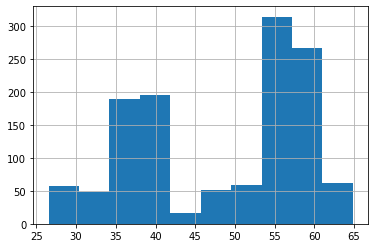

In [80]:
# Method names correspond to matplotlib methods

# Histograms
df['open'].hist();

# df['open'].plot();


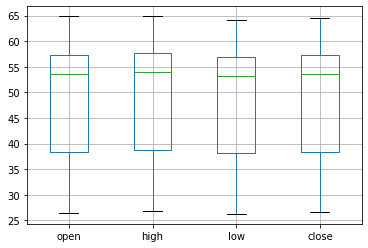

In [81]:
# The box represents q1=0.25 and q3=0.75, the green line is the median (q2=0.5)
# https://www.youtube.com/watch?v=INSIyaZUXIY
# Often used to compare and contrast the same variable of two groups, like the height distribution of men and women in a sample
df[['open', 'high', 'low', 'close']].boxplot();

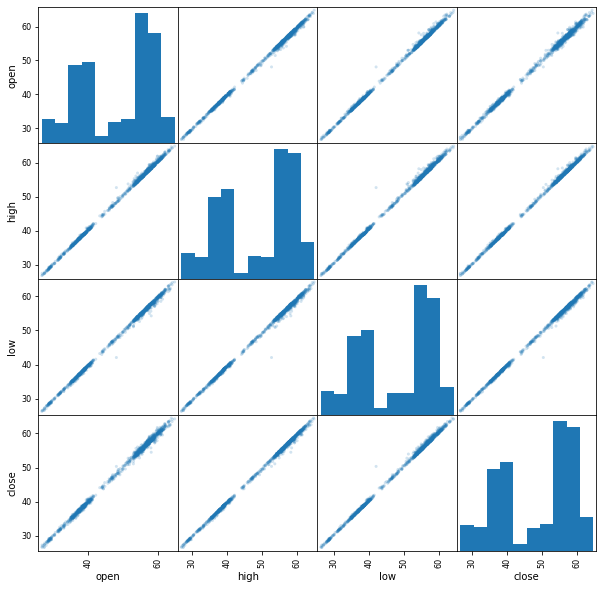

In [83]:
# Scatter matrix
from pandas.plotting import scatter_matrix

scatter_matrix(df[['open', 'high', 'low', 'close']], alpha=0.2, figsize=(10,10));
# https://stats.stackexchange.com/questions/487150/correlation-is-a-symmetric-measure-but-scatter-plot-matrix-shows-asymmetric-dep#:~:text=Conclusion%3A%20It's%20common%20that%20scatterplot,correlation%20between%20variables%20have%20changed.